In [1]:
!pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\S319883\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def retirement_portfolio(current_savings, monthly_savings_list, annual_return_during_savings, 
                         annual_return_during_retirement, start_retirement, years_in_retirement, 
                         initial_monthly_withdrawal, inflation_rate):
    # Convert annual returns and inflation to monthly
    monthly_return_savings = (1 + annual_return_during_savings) ** (1/12) - 1
    monthly_return_retirement = (1 + annual_return_during_retirement) ** (1/12) - 1
    monthly_inflation = (1 + inflation_rate) ** (1/12) - 1
    
    # Calculate the number of months
    months_until_retirement = start_retirement * 12
    months_in_retirement = years_in_retirement * 12
    
    # Initialize arrays to hold the values
    savings_balance = np.zeros(months_until_retirement + months_in_retirement)
    monthly_withdrawals = np.zeros(months_until_retirement + months_in_retirement)
    
    # Adjust the length of monthly_savings_list if necessary
    if len(monthly_savings_list) < months_until_retirement:
        monthly_savings_list.extend([monthly_savings_list[-1]] * (months_until_retirement - len(monthly_savings_list)))
    elif len(monthly_savings_list) > months_until_retirement:
        monthly_savings_list = monthly_savings_list[:months_until_retirement]

    # Adjust monthly savings for inflation
    inflation_adjusted_savings_list = [monthly_savings_list[0]]
    for month in range(1, months_until_retirement):
        inflation_adjusted_savings_list.append(monthly_savings_list[month] * (1 + monthly_inflation) ** month)
    
    # Calculate savings growth until retirement
    for month in range(months_until_retirement):
        current_savings = current_savings * (1 + monthly_return_savings) + inflation_adjusted_savings_list[month]
        savings_balance[month] = current_savings
    
    # Adjust initial monthly withdrawal for inflation up to the start of retirement
    monthly_withdrawal = initial_monthly_withdrawal * (1 + monthly_inflation) ** months_until_retirement
    
    # Calculate savings depletion during retirement
    for month in range(months_in_retirement):
        if month > 0:
            monthly_withdrawal *= (1 + monthly_inflation)
        current_savings = current_savings * (1 + monthly_return_retirement) - monthly_withdrawal
        savings_balance[months_until_retirement + month] = current_savings
        monthly_withdrawals[months_until_retirement + month] = monthly_withdrawal
    
    return savings_balance, monthly_withdrawals, months_until_retirement, months_in_retirement

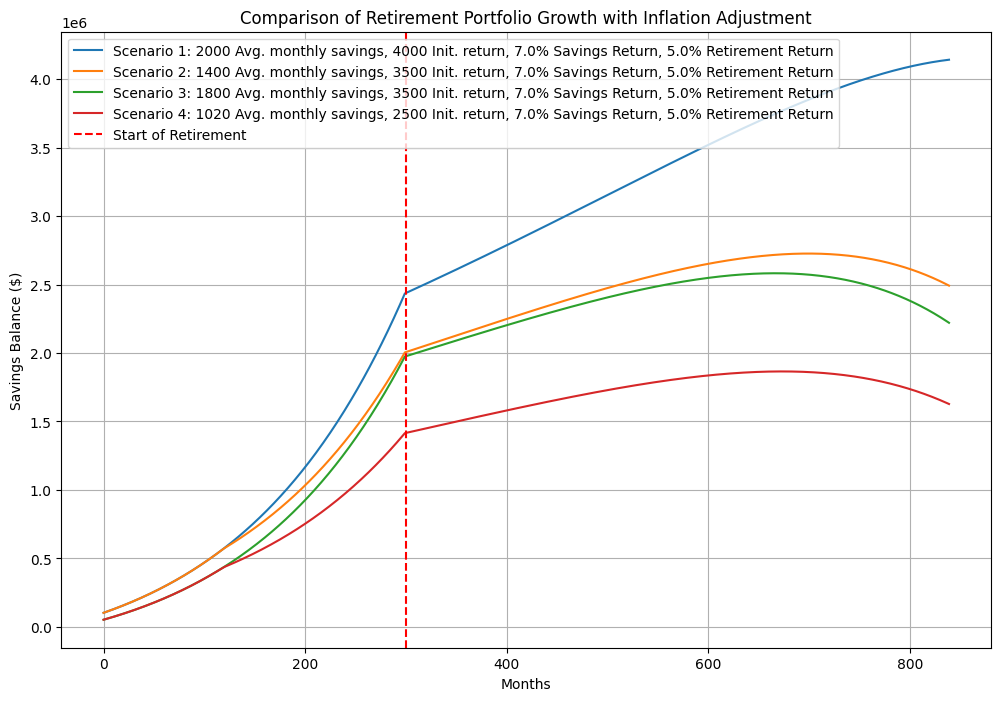

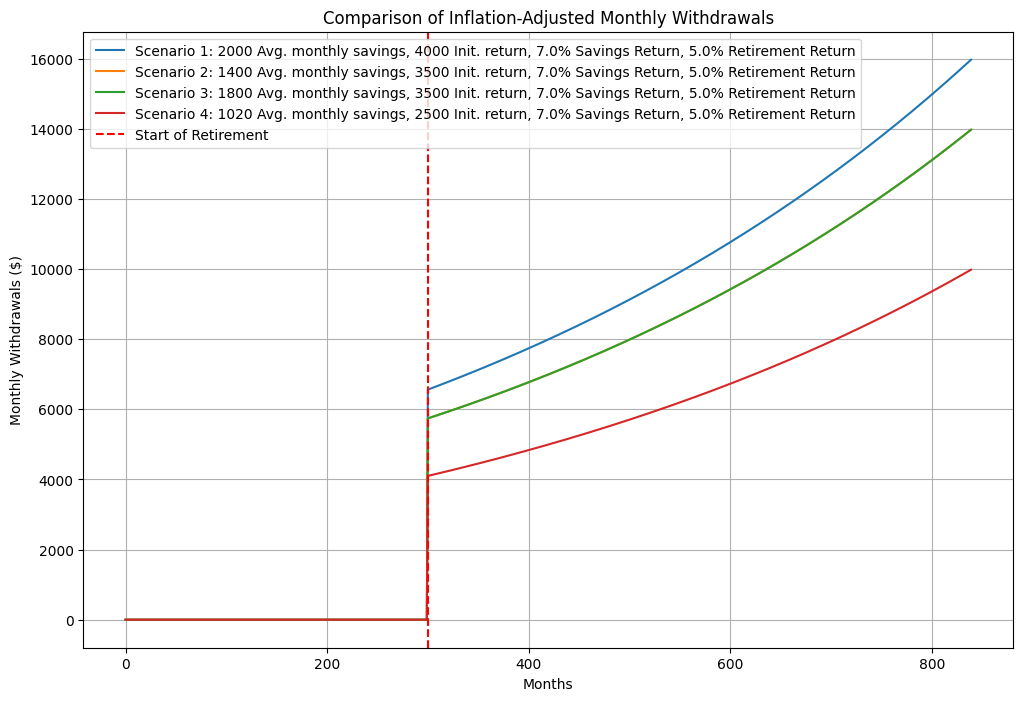

In [7]:
# Define default params
start_retirement_default = 25
years_in_retirement_default = 45
annual_return_during_savings_default = 0.07
annual_return_during_retirement_default = 0.05
inflation_rate_default = 0.02

# Define different parameter sets
parameter_sets = [
    {
        "current_savings": 0,
        "monthly_savings_list": [1000] * (start_retirement_default*12),
        "annual_return_during_savings": annual_return_during_savings_default,
        "annual_return_during_retirement": annual_return_during_retirement_default,
        "start_retirement": start_retirement_default,
        "years_in_retirement": years_in_retirement_default,
        "initial_monthly_withdrawal": 1500,
        "inflation_rate": inflation_rate_default
    },
    {
        "current_savings": 100000,
        "monthly_savings_list": [1000] * (10*12) + [500] * (10*12) + [0] * (5*12),
        "annual_return_during_savings": annual_return_during_savings_default,
        "annual_return_during_retirement": annual_return_during_retirement_default,
        "start_retirement": start_retirement_default,
        "years_in_retirement": years_in_retirement_default,
        "initial_monthly_withdrawal": 2000,
        "inflation_rate": inflation_rate_default
    },
    {
        "current_savings": 50000,
        "monthly_savings_list": [500] * (start_retirement_default*12),
        "annual_return_during_savings": annual_return_during_savings_default,
        "annual_return_during_retirement": annual_return_during_retirement_default,
        "start_retirement": start_retirement_default,
        "years_in_retirement": years_in_retirement_default,
        "initial_monthly_withdrawal": 1500,
        "inflation_rate": inflation_rate_default
    },
    {
        "current_savings": 0,
        "monthly_savings_list": [500] * (10*12) + [1000] * (10*12) + [2000] * (5*12),
        "annual_return_during_savings": annual_return_during_savings_default,
        "annual_return_during_retirement": annual_return_during_retirement_default,
        "start_retirement": start_retirement_default,
        "years_in_retirement": years_in_retirement_default,
        "initial_monthly_withdrawal": 1500,
        "inflation_rate": inflation_rate_default
    }
]

# Run the function for each parameter set and collect results
results = []
for params in parameter_sets:
    savings_balance, monthly_withdrawals, months_until_retirement, months_in_retirement = retirement_portfolio(
        params["current_savings"], params["monthly_savings_list"], params["annual_return_during_savings"], 
        params["annual_return_during_retirement"], params["start_retirement"], params["years_in_retirement"], 
        params["initial_monthly_withdrawal"], params["inflation_rate"])
    results.append((savings_balance, monthly_withdrawals, params))

# Plot the results for comparison
plt.figure(figsize=(12, 8))

for i, (savings_balance, monthly_withdrawals, params) in enumerate(results):
    plt.plot(savings_balance, label=f'Scenario {i+1}: {int(np.mean(params["monthly_savings_list"]))} Avg. monthly savings, {params["initial_monthly_withdrawal"]} Init. return, {params["annual_return_during_savings"]*100:.2}% Savings Return, {params["annual_return_during_retirement"]*100:.2}% Retirement Return')

plt.axvline(x=months_until_retirement, color='r', linestyle='--', label='Start of Retirement')
plt.xlabel('Months')
plt.ylabel('Savings Balance ($)')
plt.title('Comparison of Retirement Portfolio Growth with Inflation Adjustment')
plt.legend()
plt.grid(True)
plt.show()

# Plot the monthly withdrawals for comparison
plt.figure(figsize=(12, 8))

for i, (savings_balance, monthly_withdrawals, params) in enumerate(results):
    plt.plot(monthly_withdrawals, label=f'Scenario {i+1}: {int(np.mean(params["monthly_savings_list"]))} Avg. monthly savings, {params["initial_monthly_withdrawal"]} Init. return, {params["annual_return_during_savings"]*100:.2}% Savings Return, {params["annual_return_during_retirement"]*100:.2}% Retirement Return')

plt.axvline(x=months_until_retirement, color='r', linestyle='--', label='Start of Retirement')
plt.xlabel('Months')
plt.ylabel('Monthly Withdrawals ($)')
plt.title('Comparison of Inflation-Adjusted Monthly Withdrawals')
plt.legend()
plt.grid(True)
plt.show()